In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

for i in [pd, np, mpl, sns]:
    print(i.__name__, i.__version__)

pandas 0.25.1
numpy 1.18.5
matplotlib 3.5.3
seaborn 0.12.2


# 1-4 데이터 시각화

-  패턴 및 관계 파악, 효과적인 의사 소통

1. 추세 및 패턴 시각화


2. 이상치 탐지


3. 시각화를 통한 변수간 관계 파악

## 0. 데이터셋 소개

### Space Titanic

|variable name|description|
|---|:---|
|PassengerId|A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.|
|HomePlanet|The planet the passenger departed from, typically their planet of permanent residence.|
|CryoSleep|Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.|
|Cabin|The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.|
|Destination|The planet the passenger will be debarking to.|
|Age|The age of the passenger.|
|VIP|Whether the passenger has paid for special VIP service during the voyage.|
|RoomService, FoodCourt, ShoppingMall, Spa, VRDeck| Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.|
|Name|The first and last names of the passenger.|
|Transported|Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.|

In [2]:
df_space = pd.read_csv('data/space_titanic.csv', index_col='PassengerId')
df_space.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 데이터 전처리


1. PassengerID를 '\_'로 나누어 첫번째 변수는 PassengerGrp, 두 번째는 'GrpNo'로 추가합니다.


2. GrpNo는 정수형으로 형변환 합니다.

In [3]:
# pd.Series.str.split에서 expand=True로 설정하면 분리된 문자열들을 리스트에 모아 저장하지 않고, 
# 순서에 따라 컬럼으로 분리해서 뽑아냅니다.
df_space = pd.concat([
    df_space,
    df_space.index.to_frame()['PassengerId'].str.split('_', expand=True).rename( 
        columns={0: 'PassengerGrp', 1: 'GrpNo'}
    ).assign(
        GrpNo = lambda x: x['GrpNo'].astype(int)
    ),
], axis=1)

In [4]:
df_space.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGrp,GrpNo
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,1
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1


## 1. 바이올린 플롯(Viloin Plot)

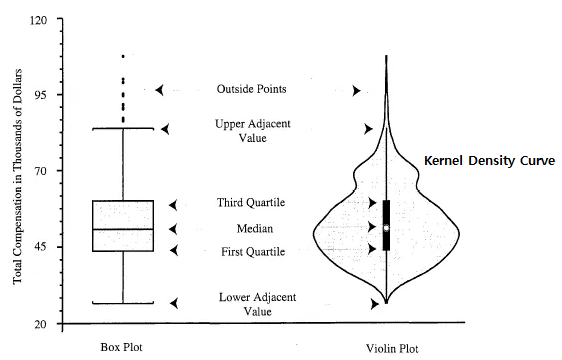

이미지 출처: [Violin plots explained](https://towardsdatascience.com/violin-plots-explained-fb1d115e023d)

### 특징

1. 연속형 데이터의 분포와 사분위 통계 정보를 출력합니다.

<div style="border: 0px solid #ddd; padding: 12px;">
    
- 박스 플롯과 커널 밀도 플롯이 결합한 형태의 출력물을 제공합니다.

</div>

2. 범주형 데이터와 결합하여 차트를 구성할 수 있습니다.

<div style="border: 0px solid #ddd; padding: 12px;">

- 이진형 변수와 결합하여 중심축을 기준으로 좌우를 구분하여 나타낼 수 있습니다.


-  범주형 변수를 축에 포함시켜, 수준별 바이올린 차트를 출력하도록 구성할 수 있습니다.
    
</div>

**[Ex.1]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_space의 Age를 바이올린 플롯으로 출력합니다.
    
</div>

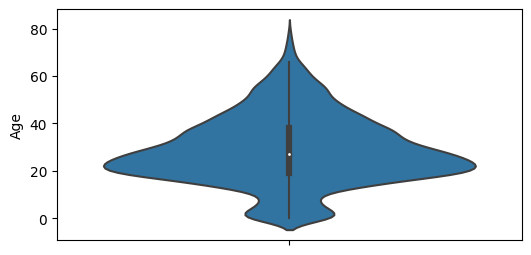

In [5]:
plt.figure(figsize=(6, 3))
sns.violinplot(data=df_space, y='Age')
plt.show()

**[Ex.2]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_space에서 중심축 좌우를 Transported로 구분하고 x축은 HomePlanet으로, y축은 Age로 하여 바이올린 플롯으로 출력합니다.
    
</div>

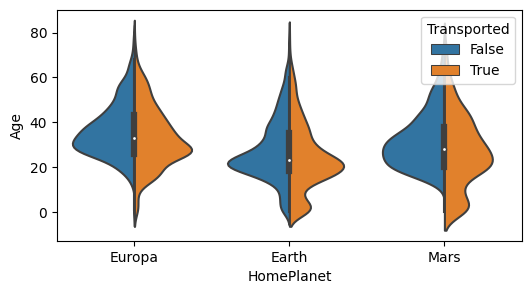

In [6]:
plt.figure(figsize=(6, 3))
sns.violinplot(data=df_space, x='HomePlanet', y='Age', split=True, hue='Transported')
plt.show()

## 2. 줄기 잎 플롯 (Stem and Leaf Plot)

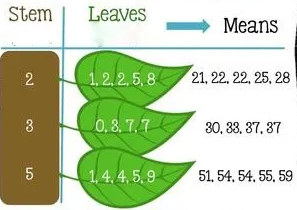

이미지 출처: [Stem and Leaf Plot — The Tree of Visualization.](https://cskoushik00.medium.com/stem-and-leaf-plot-the-tree-of-visualization-de451eb430c7)

### 특징

- 데이터의 분포와 동시에 상세 값을 표시할 수 있습니다.

**[Ex.3]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

Stem and Leaf Plot을 이용하여 다음 데이터를 출력해봅니다.

```
data = np.array([21, 22, 22, 25, 28, 30, 33, 37, 37, 51, 54, 54, 55, 59])
```
    
</div>

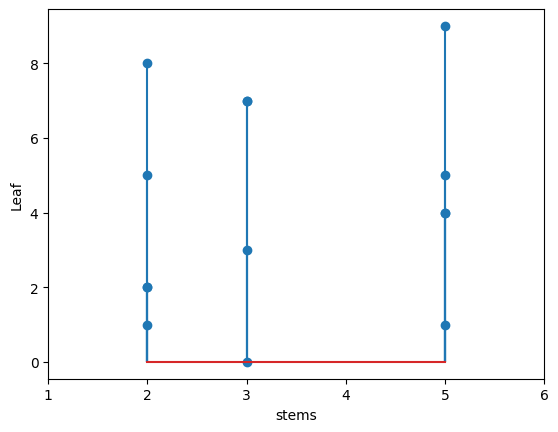

In [7]:
data = np.array([21, 22, 22, 25, 28, 30, 33, 37, 37, 51, 54, 54, 55, 59])
stems = data // 10
  
plt.ylabel('Leaf')
plt.xlabel('stems') 
plt.xlim(1, 6) 
  
plt.stem(
    data // 10, # Stem 
    data % 10, # Leaf
)
plt.show()

## 평행 좌표 그림 (Parallel Coordinates)

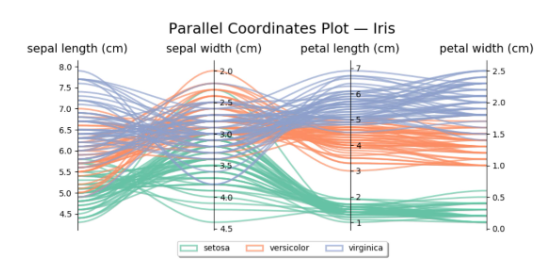

### 특징

1. 다차원 데이터의 패턴이나 군집을 직관적으로 보여줍니다.

<div style="border: 0px solid #ddd; padding: 12px;">

-  변수는 수직선으로 표현이 되고, 값은 수직선 위에 점으로 표시합니다.


-  동일 레코드에 수직선에 표시된 이웃점들을 선으로 연결하여 표시합니다.


-  색상이나 점의 모양으로 표본의 소속 군집을 표현합니다.

</div>

2. 데이터가 너무 많으면 지나치게 많은 선들이 겹쳐지게 되어 파악이 어려워집니다.


3. 효과적인 출력을 위한 변수의 출력 순서를 정하기 어렵습니다.

**[Ex.4]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

CryoSleep이 False인 행들에서 PassengerGrp과 HomePlanet별로 RoomService, FoodCourt, ShoppingMall, Spa, VRDeck의 합계를 내어 df_spend 데이터프레임을 만듭니다. 

RoomService와 FoodCourt, ShoppingMall, Spa, VRDeck을 $log(X + 1)$ 변환하여, 변수의 폭을 줄여서 그래프로 출력이 용이하도록 합니다.

HomePlanet 별로 색상을 구분한 Parellel Coordindates를 출력합니다.
    
</div>

In [8]:
spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

df_spend = df_space.loc[df_space['CryoSleep'] == False]\
    .groupby(['PassengerGrp', 'HomePlanet'], as_index=False)[spend_cols].sum()

df_spend[spend_cols] = np.log(df_spend[spend_cols] + 1)

df_spend

,PassengerGrp,HomePlanet,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0001,Europa,0.000000,0.000000,0.000000,0.000000,0.000000
1,0002,Earth,4.700480,2.302585,3.258097,6.309918,3.806662
2,0003,Europa,3.784190,8.488794,5.918894,9.214830,5.493061
3,0004,Earth,5.717028,4.262680,5.023881,6.338594,1.098612
4,0005,Earth,0.000000,6.182085,0.000000,5.676754,0.000000
...,...,...,...,...,...,...,...
4349,9272,Earth,5.789960,5.505332,6.492240,5.342334,5.799093
4350,9275,Europa,0.693147,7.044905,0.000000,3.931826,3.555348
4351,9276,Europa,0.000000,8.827615,0.000000,7.404888,4.317488
4352,9279,Earth,0.000000,0.000000,7.535297,0.693147,0.000000


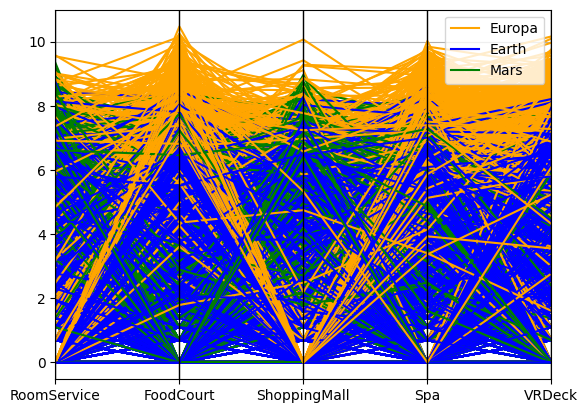

In [9]:
pd.plotting.parallel_coordinates(df_spend, 'HomePlanet', spend_cols, color=['orange', 'blue', 'green'])
plt.show()

**[Ex.5]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

HomePlanet 별로 20개의 표본을 뽑아 출력해 봅니다.
    
</div>

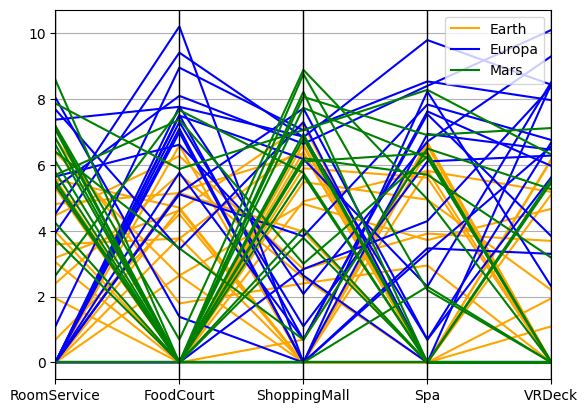

In [10]:
pd.plotting.parallel_coordinates(
    df_spend.groupby('HomePlanet', as_index=False).apply(lambda x: x.sample(n=20, random_state=123)), 
    'HomePlanet', spend_cols, color=['orange', 'blue', 'green']
)

plt.show()